In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score


In [28]:
# set options
pd.options.display.max_columns=None

In [29]:
os.getcwd()

'C:\\Users\\Dhananjay\\3D Objects\\imarticus PGDA\\Machine learning\\Supervised Learning\\RANDOM FOREST\\DECision Tree and Random forest assesment'

In [30]:
data=pd.read_csv('admission.csv')
df =data.copy(deep=True)
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


Q1: Perform Exploratory Data Analysis (EDA) tasks 
a) Visualize the 10 random rows of the data set
b) Generate the description for numeric variables
c) Check the shape of the data set
d) Generate the correlation matrix
e) Generate a correlogram

In [31]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [32]:
df =df.drop('Serial No.',axis =1)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [33]:
df_10=df.head(10)
df_10

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


C:\Users\Dhananjay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dhananjay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dhananjay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

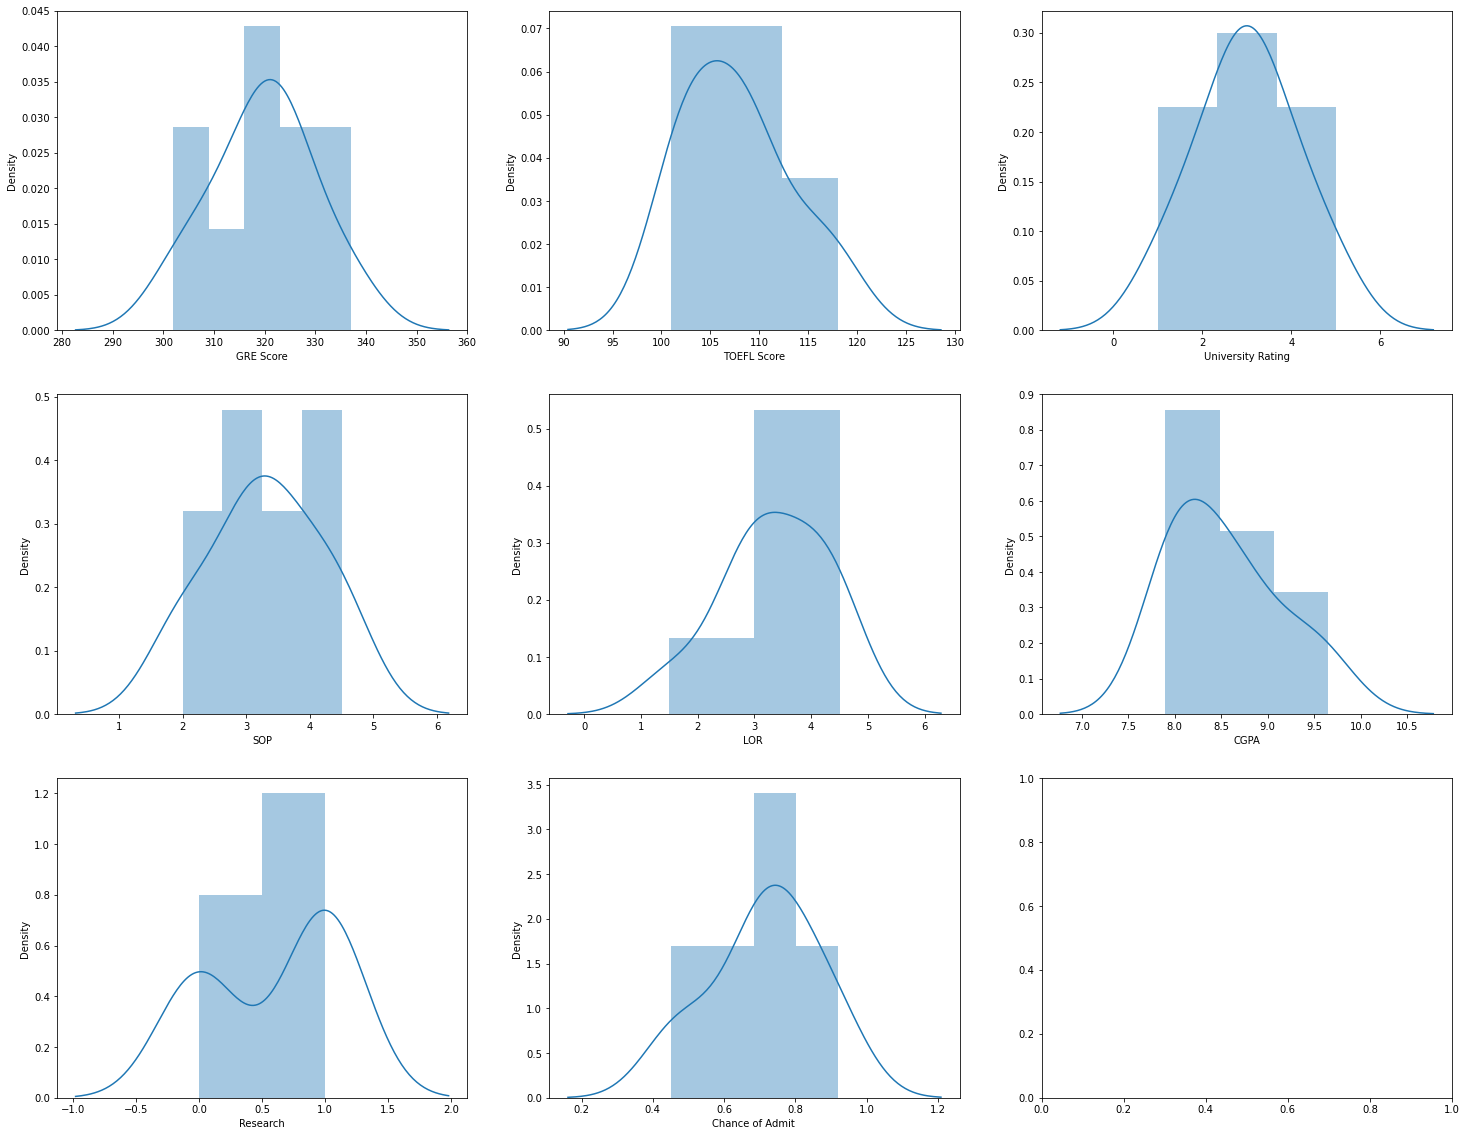

In [34]:
#1a) Visualizing 10 rows or records

#ploting the distplot of 10 rows


fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(25,20))


for  variable, subplot in zip(df_10, ax.flatten()):
    
    sns.distplot(df_10[variable],kde=True,ax = subplot)

In [35]:
#b) Generate the description for numeric variables

df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


 we can get the info about count,mean ,std,mimimum values,max values and more information of all variables which are numeric

In [36]:
#c) Check the shape of the data set
df.shape


(500, 8)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


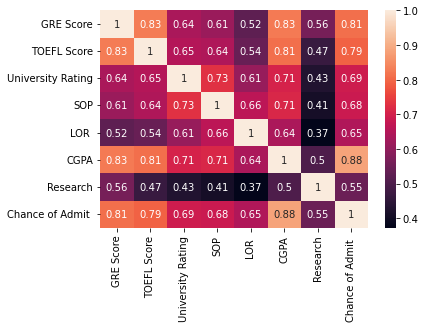

In [37]:
#d) Generate the correlation matrix
sns.heatmap(df.corr(),annot =True)
df.corr()

This is correlation matrix generated by heat map

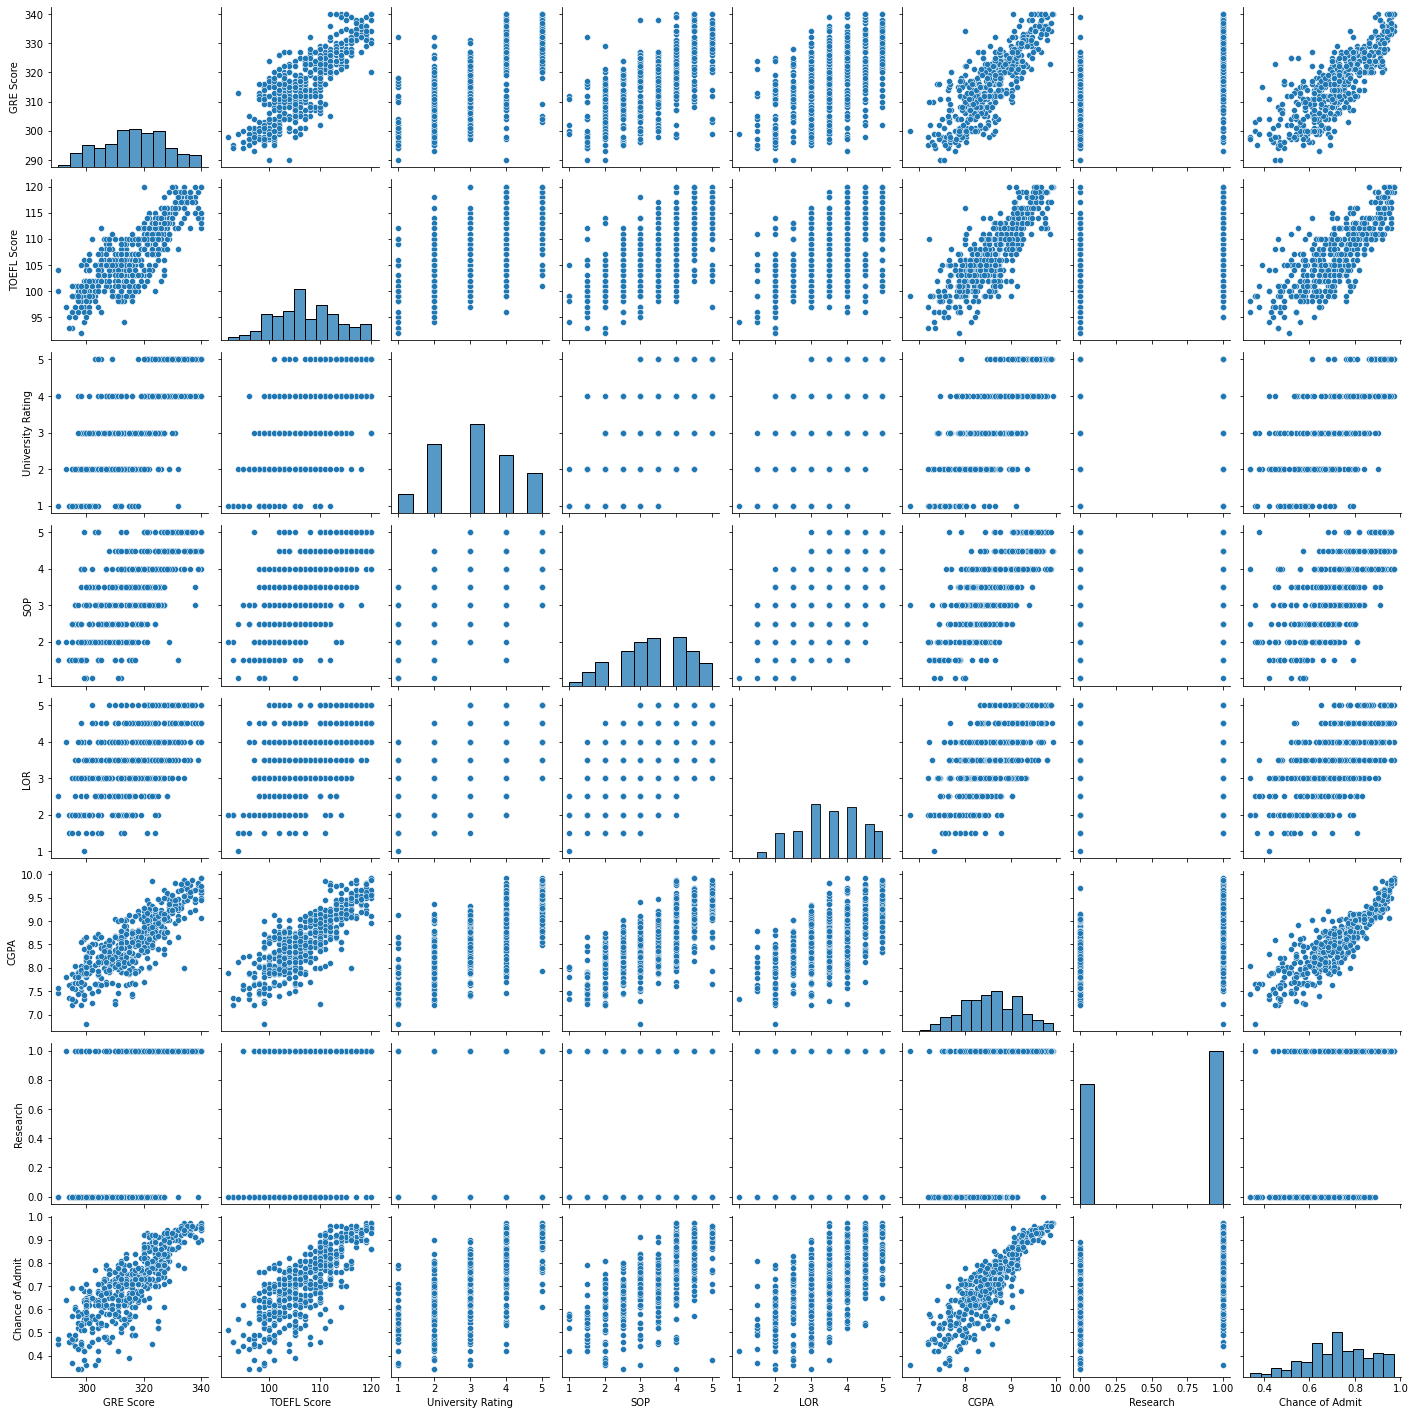

In [12]:
#e) Generate a correlogram
sns.pairplot(df)


A correlogram or correlation matrix allows to analyse the relationship between each pair of numeric variables of a matrix.
The correlation is visualised as a scatterplot.
The diagonal represents the distribution of each variable with a histogram or a density plot.

In [38]:
#Q2Find out the minimum and maximum values for GRE score

print(" Maximum values of GRE score is",df['GRE Score'].max()) 
print("Minimum values of GRE score is",df['GRE Score'].min()) 



 Maximum values of GRE score is 340
Minimum values of GRE score is 290


# Q 3

In [39]:
# Find out the percentage of universities for each university rating
df_ratings=pd.DataFrame({'University Ratings':df['University Rating'].unique(),'count':df['University Rating'].value_counts(),'percentage':(df['University Rating'].value_counts()/df.shape[0])*100} )
df_ratings

,University Ratings,count,percentage
3,4,162,32.4
2,3,126,25.2
4,2,105,21.0
5,5,73,14.6
1,1,34,6.8


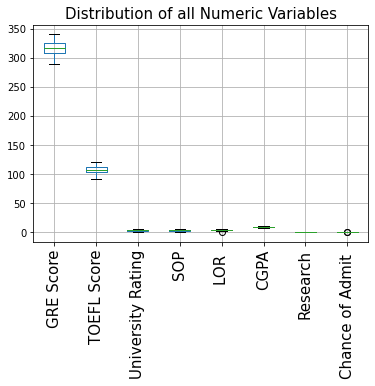

In [40]:
# plot a boxplot to visualize the outliers in all the numeric variables
df.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

In [41]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

# Q 4:
Convert the target variable “Chance of Admit” to 
categorical having values 0 and 1,such that :
Students having the “Chance of Admit” value > 0.80, are assigned 
value 1, and
Students having the “Chance of Admit” value < 0.80, are assigned 
value 0
Where 0: Low chance of Admission and 1: High chance of 
admission

In [42]:
for i in df['Chance of Admit ']:
    if i>= 0.80:
        df['Chance of Admit '].replace(i,1,inplace=True)
    else:
        df['Chance of Admit '].replace(i,0,inplace=True)

In [43]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1.0
1,324,107,4,4.0,4.5,8.87,1,0.0
2,316,104,3,3.0,3.5,8.00,1,0.0
3,322,110,3,3.5,2.5,8.67,1,1.0
4,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,1.0
496,337,117,5,5.0,5.0,9.87,1,1.0
497,330,120,5,4.5,5.0,9.56,1,1.0
498,312,103,4,4.0,5.0,8.43,0,0.0


In [44]:
df['Chance of Admit ']=df['Chance of Admit '].astype(int)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,1
496,337,117,5,5.0,5.0,9.87,1,1
497,330,120,5,4.5,5.0,9.56,1,1
498,312,103,4,4.0,5.0,8.43,0,0


In [45]:
df_backup=df.copy(deep=True)


In [46]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve for Model', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, test_pred),4)))

    # plot the grid
    plt.grid(True)

# Q5 

In [47]:
#Build a Decision Tree classifier, to predict whether a 
#student has a low or high chance of admission to a chosen 
#university. Perform Hyperparameter Tuning to improve 
#the accuracy of the model.

# DECISION TREE Classifier Base MOdel

In [48]:
from sklearn.model_selection import train_test_split,GridSearchCV 
from sklearn.metrics import classification_report as report
from sklearn.metrics import confusion_matrix as matrix
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
# dataset

x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

# data splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)


In [51]:
# standardizing the data
from sklearn.preprocessing import MinMaxScaler

msc=MinMaxScaler()
x_train_msc=msc.fit_transform(x_train)
x_test_msc=msc.transform(x_test)

In [52]:
# model fitting

DCT=DecisionTreeClassifier(max_depth=5,min_samples_split=25)
DCT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=25)

In [53]:
# predicting
train_pred=DCT.predict(x_train)
test_pred=DCT.predict(x_test)

In [93]:
#Train Results


print(" TRain Confussion matrix \n",matrix(y_train,train_pred))
print('\n Train classification report \n',report(y_train,train_pred))


#Test results
print(" \nTest Confussion matrix \n",matrix(y_test,test_pred))
print('\n Test classification report \n',report(y_test,test_pred))





 TRain Confussion matrix 
 [[253   9]
 [ 15  98]]

 Train classification report 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       262
           1       0.92      0.87      0.89       113

    accuracy                           0.94       375
   macro avg       0.93      0.92      0.92       375
weighted avg       0.94      0.94      0.94       375

 
Test Confussion matrix 
 [[79  4]
 [ 8 34]]

 Test classification report 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        83
           1       0.89      0.81      0.85        42

    accuracy                           0.90       125
   macro avg       0.90      0.88      0.89       125
weighted avg       0.90      0.90      0.90       125



In [40]:
# MODEL with SCaled DATA


DCT=DecisionTreeClassifier()
DCT.fit(x_train_msc,y_train)

# predicting
train_pred=DCT.predict(x_train_msc)
test_pred=DCT.predict(x_test_msc)

#Train Results
print("Accuracy :",accuracy_score(y_test,test_pred)*100,"%")
print(" TRain Confussion matrix \n",matrix(y_train,train_pred))
print('\n Train classification report \n',report(y_train,train_pred))


#Test results
print(" \nTest Confussion matrix \n",matrix(y_test,test_pred))
print('\n Test classification report \n',report(y_test,test_pred))


Accuracy : 89.60000000000001 %
 TRain Confussion matrix 
 [[262   0]
 [  0 113]]

 Train classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       262
           1       1.00      1.00      1.00       113

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375

 
Test Confussion matrix 
 [[78  5]
 [ 8 34]]

 Test classification report 
               precision    recall  f1-score   support

           0       0.91      0.94      0.92        83
           1       0.87      0.81      0.84        42

    accuracy                           0.90       125
   macro avg       0.89      0.87      0.88       125
weighted avg       0.90      0.90      0.89       125



These model is not good fit model as train accuracy and test accuracy have lot of difference

In [55]:
# Hyperparameter tuning
DCTE=DecisionTreeClassifier()

params={ 'max_depth':[5,10,15,20,30],'min_samples_split':[10,20,25,40,60,100]}
grid_tree=GridSearchCV(estimator=DCTE, param_grid=params, cv=4, n_jobs=-1,scoring ='accuracy')


In [56]:
grid_tree.fit(x_train_msc,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 30],
                         'min_samples_split': [10, 20, 25, 40, 60, 100]},
             scoring='accuracy')

In [57]:
grid_best=grid_tree.best_estimator_
grid_best

DecisionTreeClassifier(max_depth=5, min_samples_split=20)

In [92]:
#fitting model with best hyperparameters
grid_best.fit(x_train_msc,y_train)

# predicting
train_pred=grid_best.predict(x_train_msc)
test_pred=grid_best.predict(x_test_msc)

#Train Results
print("Accuracy :",accuracy_score(y_test,test_pred)*100,"%")
print(" TRain Confussion matrix \n",matrix(y_train,train_pred))
print('\n Train classification report \n',report(y_train,train_pred))


#Test results
print(" \nTest Confussion matrix \n",matrix(y_test,test_pred))
print('\n Test classification report \n',report(y_test,test_pred))

Accuracy : 90.4 %
 TRain Confussion matrix 
 [[253   9]
 [ 15  98]]

 Train classification report 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       262
           1       0.92      0.87      0.89       113

    accuracy                           0.94       375
   macro avg       0.93      0.92      0.92       375
weighted avg       0.94      0.94      0.94       375

 
Test Confussion matrix 
 [[79  4]
 [ 8 34]]

 Test classification report 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        83
           1       0.89      0.81      0.85        42

    accuracy                           0.90       125
   macro avg       0.90      0.88      0.89       125
weighted avg       0.90      0.90      0.90       125



this hypertuned model is better than BASE model

# Q6

In [59]:
#Build a Random Forest classifier, to predict whether a 
#student has a low or high chance of admission to a chosen 
#niversity.

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfr =RandomForestClassifier(random_state=100, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)

In [62]:
rfr.fit(x_train_msc,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=100)

In [63]:


# predicting
train_pred=rfr.predict(x_train_msc)
test_pred=rfr.predict(x_test_msc)

#Train Results
print("Accuracy :",accuracy_score(y_test,test_pred)*100,"%")
print(" TRain Confussion matrix \n",matrix(y_train,train_pred))
print('\n Train classification report \n',report(y_train,train_pred))


#Test results
print(" \nTest Confussion matrix \n",matrix(y_test,test_pred))
print('\n Test classification report \n',report(y_test,test_pred))

Accuracy : 93.60000000000001 %
 TRain Confussion matrix 
 [[256   6]
 [  4 109]]

 Train classification report 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       262
           1       0.95      0.96      0.96       113

    accuracy                           0.97       375
   macro avg       0.97      0.97      0.97       375
weighted avg       0.97      0.97      0.97       375

 
Test Confussion matrix 
 [[80  3]
 [ 5 37]]

 Test classification report 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        83
           1       0.93      0.88      0.90        42

    accuracy                           0.94       125
   macro avg       0.93      0.92      0.93       125
weighted avg       0.94      0.94      0.94       125



this model is good as it is having high train accuracy as well as high test accuracy

# Q.7 
Also use Ensemble Modelling techniques, to predict 
whether a student has a low or high chance of admission 
to a chosen university. 

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
from xgboost import XGBClassifier

In [66]:
xgb=XGBClassifier(objective='reg:logistic',use_label_encoder =False)

In [67]:
xgb.fit(x_train_msc,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='reg:logistic', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [68]:
# predicting
train_pred=xgb.predict(x_train_msc)
test_pred=xgb.predict(x_test_msc)

#Train Results
print("Accuracy :",accuracy_score(y_test,test_pred)*100,"%")

print(" TRain Confussion matrix \n",matrix(y_train,train_pred))
print('\n Train classification report \n',report(y_train,train_pred))


#Test results
print(" \nTest Confussion matrix \n",matrix(y_test,test_pred))
print('\n Test classification report \n',report(y_test,test_pred))

Accuracy : 91.2 %
 TRain Confussion matrix 
 [[262   0]
 [  0 113]]

 Train classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       262
           1       1.00      1.00      1.00       113

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375

 
Test Confussion matrix 
 [[76  7]
 [ 4 38]]

 Test classification report 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93        83
           1       0.84      0.90      0.87        42

    accuracy                           0.91       125
   macro avg       0.90      0.91      0.90       125
weighted avg       0.91      0.91      0.91       125



In [85]:
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   ])

# append the result table for all performance scores
# performance measures considered for comparision are 'AUC', 'Precision', 'Recall','Accuracy','Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model_name):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model': model_name,
                                    
                                    'Precision Score': metrics.precision_score(y_test, test_pred),
                                    'Recall Score': metrics.recall_score(y_test, test_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, test_pred)} 
                                     ,ignore_index = True)
    return(score_card)

In [86]:
from sklearn import metrics

In [87]:
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [88]:
score_card

,Model,Precision Score,Recall Score,Accuracy Score


In [ ]:
#Q8 comparision of model
Decision Tree Base model : precision =


In [94]:
comparision=pd.DataFrame({'Model':['Decision tree base','Decision tree hypertuned','Random Forest Base model','XGB Classifier'],
                         'Precision %':[91,91,94,95],'Recall %':[95,95,96,92],'Accuracy %':[90.4,90,94,91]})
comparision

,Model,Precision %,Recall %,Accuracy %
0,Decision tree base,91,95,90.4
1,Decision tree hypertuned,91,95,90.0
2,Random Forest Base model,94,96,94.0
3,XGB Classifier,95,92,91.0


From these scores we can conclude that Random Forest Base model is the best modal among all